<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW4_woodenML_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 4 (pro): древесные алгоритмы**

### **Постановка задач**

### **Домашнее задание состоит из двух подзадач:**

**1. В  разделе 1 ваша задача:**
-  реализовать свое решающее дерево
- сравнить его со стандартной имплементацией из sklearn

Функции и классы дерева вы должны оформить в модуль `hw4_code_pro.py`.

**2. В разделе два ваша задача:** решить задачу бинарной классификации при помощи написанного Вами дерева, а также леса из sklearn, а после интерпретировать лучшие модели. Чуть точнее

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT, а также RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**
- Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.
- Неэффективная реализация кода может негативно отразиться на оценке.

### **Формат сдачи:**
Задания сдаются через  anytask. Посылка должна содержать:
* Ноутбук в формате ipynb
* Модуль hw4_code_pro.py


### **Баллы:**

Суммарно за задание можно получить 10 основных баллов и 1 бонусный балло.

Оценка за ДЗ = min{ваш балл, 10}

Мягкий дедлайн: 2 февраля 23:59

**Продуктивной и интересной вам работы!**


In [1]:
%pip install optuma

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement optuma (from versions: none)
ERROR: No matching distribution found for optuma

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\bodyk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style='whitegrid')

import psycopg2
import psycopg2.extras

import shap
import lime
import lime.lime_tabular

# import optuna

import pickle

import warnings
warnings.filterwarnings('ignore')

C:\Users\bodyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **1. Решающие деревья своими руками (6 баллов)**

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Всего за часть вы можете получить 6 основных баллов и 1 бонусный.

### **Задание 1. (1 балл)**

Реализуйте функцию find_best_split из модуля hw4_code_pro.py

In [3]:
# Заполните код в модуле

### **Задание 2. (0.25 балла)**

Загрузите таблицу [students.csv](https://github.com/AnastasiyaMax/MLDS_ml_course_fall21/blob/main/hw/hw5_trees/students.csv). Это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling).

В наборе данных:
- признаки объекта записаны в первых пяти столбцах;
- в последнем записана целевая переменная (класс: 0 или 1).

По этим данным, используя функцию из задания 1, постройте:
- пять кривых "порог — значение критерия Джини" для всех пяти признаков;
- scatter-графики "значение признака — класс" для всех пяти признаков;

In [4]:
from hw4_code_pro import find_best_split

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r),$$
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
    $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

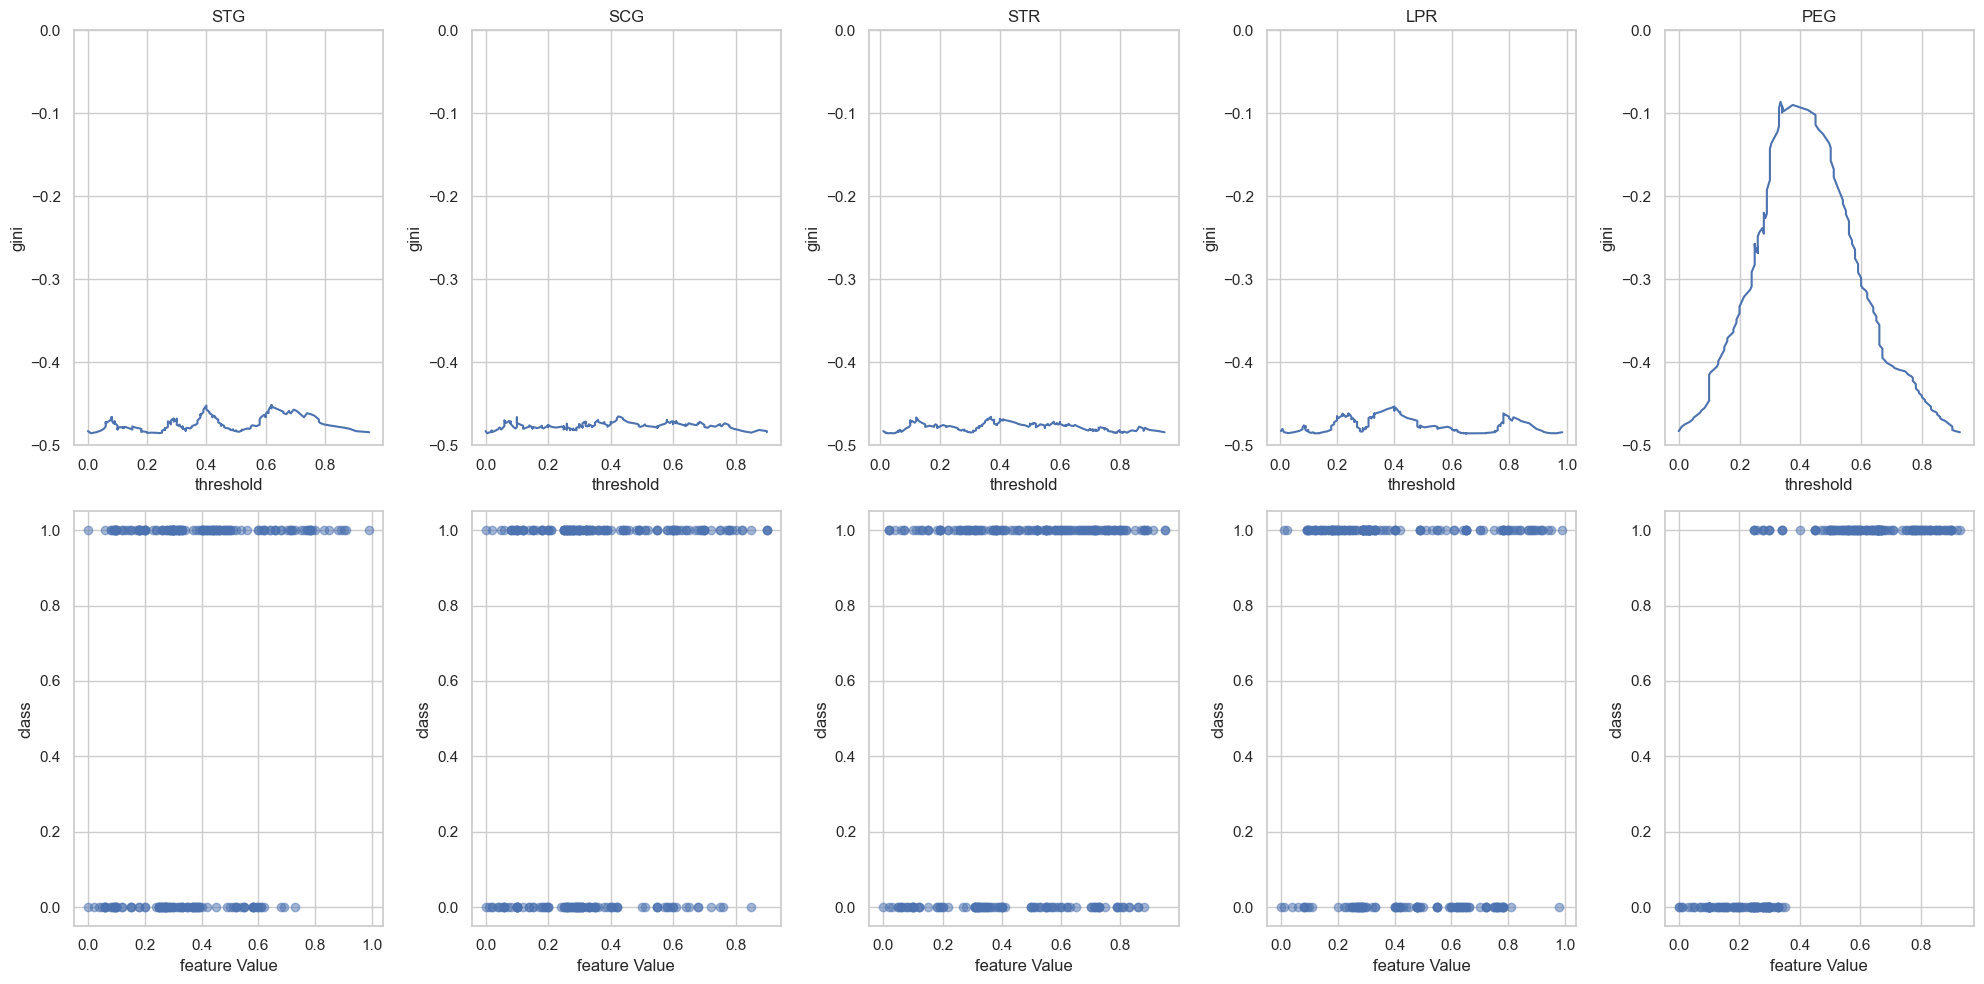

In [5]:
url = "https://raw.githubusercontent.com/AnastasiyaMax/MLDS_ml_course_fall21/main/hw/hw5_trees/students.csv"
data = pd.read_csv(url)

features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values

plt.figure(figsize=(20, 10))

# Кривые "порог — значение критерия Джини"
for i in range(features.shape[1]):
    thresholds, ginis, _, _ = find_best_split(features[:, i], target)
    
    plt.subplot(2, 5, i + 1)
    plt.plot(thresholds, ginis)
    plt.title(f"{data.columns[i]}")
    plt.xlabel("threshold")
    plt.ylabel("gini")
    plt.ylim(-0.5, 0)

for i in range(features.shape[1]):
    plt.subplot(2, 5, i + 6)
    plt.scatter(features[:, i], target, alpha=0.5)
    plt.xlabel("feature Value")
    plt.ylabel("class")

plt.tight_layout()
plt.savefig('five_curves.png')
plt.show()

### **Задание 3. (0.6 балла)**

Проанализируйтте построенные кривые. Ответьте на поставленные вопросы:
- По какому признаку нужно производить деление выборки на два поддерева? (0.15 балла)

    `Судя по графику, нужно разделять выборку по признаку PEG`
- Согласуется ли этот результат с визуальной оценкой scatter-графиков? (0.15 балла)

    `Да, у признака при разделении по признаку PEG целевая переменная чётко разделяется вертикальной линией`
- Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? (0.15 балла)

    `Четко выраженный максимум в раёоне наилцчшего порога`

- Чем отличаются кривые для признаков, по которым деление практически невозможно? (0.15 балла)

    `Отсутсвие выраженного пика и низкие значения критерия Джинни`

### **Задание 4. (1.15 балла)**

В некоторых случаях необходимо анализировать код исполненного класса на предмет оптимальности и ошибок. Потренируйтесь в этом!

- Разберитесь с уже написанным кодом в классе DecisionTree модуля hw4_code_pro.py.
- Найдите ошибки в реализации метода \_fit_node.
- Напишите функцию \_predict_node.

**Примечание 1:**

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева».
- Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Примечание 2:**

- Выбор лучшего разбиения необходимо производить по критерию Джини.
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку, чтобы Джини упал
- Ответ в листе: наиболее часто встречающийся класс в листе.


### **Задание 5. (0.5 балла)**

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Для этого:

- Скачайте таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/))
- Прочитайте данные с помощью pandas
- Примените к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа.
- Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные)
- Сделайте предсказания для оставшейся половины.
- Вычислите accuracy (так как мы используем эту метрику и в силу задачи, нам не очень важно, что будет классом 1, а что — классом 0).  


У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [6]:
from sklearn.preprocessing import LabelEncoder
from hw4_code_pro import DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [7]:
url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url, header=None)

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [8]:
X = data.drop(0, axis=1).values
y = data[0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)

In [9]:
feature_types = ["real"] * X.shape[1] 
my_tree = DecisionTree(feature_types=feature_types)
my_tree.fit(X_train, y_train)

print(f'Accuracy для собственной реализации: {accuracy_score(my_tree.predict(X_test), y_test)}')

Accuracy для собственной реализации: 0.9950763170851797


In [10]:
sklern_tree = DecisionTreeClassifier()
sklern_tree.fit(X_train, y_train)

print(f'Accuracy для библиотеной реализации: {accuracy_score(sklern_tree.predict(X_test), y_test)}')

Accuracy для библиотеной реализации: 1.0


### **Задание 6. (бонус, 1 балл)**

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующее задание).

`Реализовал в модуле. Значения по умолчанию поставил такие же, как у DecisionTreeClassifier`

### **Задание 7. (2 балла)**

**1. Загрузите следующие наборы данных** (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (они записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**2. Закодируйте категориальные признаки, использовав LabelEncoder.** С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации:**
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами.

In [11]:
mashrooms_url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
tic_tac_toe_url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
cars_url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
nursey_url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"

class_mapping_cars = {"unacc": 0, "acc": 0, "good": 1, "vgood": 1}
class_mapping_nursey = {"not_recom": 0, "recommend": 0, "very_recom": 1, "priority": 1, "spec_prior": 1}

datasets = {'mushrooms':{'url':mashrooms_url, 'target':0, 'class_mapping': None}, 
            'tic-tac-toe': {'url': tic_tac_toe_url, 'target':-1, 'class_mapping': None}, 
            'cars': {'url': cars_url, 'target':-1, 'class_mapping': class_mapping_cars}, 
            'nursey': {'url': nursey_url, 'target':-1, 'class_mapping': class_mapping_nursey}}


In [12]:
def preprocessing_data(url, target, class_mapping=None):
    data = pd.read_csv(url, header=None)
    if target == -1:
        target = data.shape[1] - 1
    X = data.drop(target, axis=1)
    y = data[target]
    
    if class_mapping:
        y = y.map(class_mapping)
    else:
        le = LabelEncoder()
        y = le.fit_transform(y)

    for column in X.select_dtypes(include=['category', 'object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(data[column])
    return X, y


def one_hot_encoder(X):
    X = pd.DataFrame(X)
    X = X.map(str)
    return pd.get_dummies(X, dtype='int', drop_first=True)


def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(accuracy_score))
    return np.mean(scores)


In [13]:
def train_and_evaluate(datasets, results):
    for dataset in datasets:
        
        url = datasets[dataset]['url']
        target = datasets[dataset]['target']
        class_mapping = datasets[dataset]['class_mapping']
        
        # Загрузка и предобработка данных
        X, y = preprocessing_data(url, target, class_mapping)
        X = np.array(X)
        y = np.array(y)
        
        # Создание и обучение моделей
        models = {
            'MyTree, real': DecisionTree(feature_types=["real"] * X.shape[1], max_depth=5),
            'MyTree, cat': DecisionTree(feature_types=["categorical"] * X.shape[1], max_depth=5),
            'MyTree, real + ohe': DecisionTree(feature_types=["real"] * one_hot_encoder(X).shape[1], max_depth=5),
            'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5)
        }
        
        # Обучение и оценка моделей
        for model_name, model in models.items():
            if 'ohe' in model_name:
                X_transformed = one_hot_encoder(X)
                X_transformed = np.array(X_transformed)
            else:
                X_transformed = X
            
            model.fit(X_transformed, y)
            results.loc[dataset, model_name] = f'{evaluate_model(model, X_transformed, y):.4f}'
            # print(f'Accuracy для собственной реализации: {accuracy_score(my_tree.predict(X_transformed), y)}')

results = pd.DataFrame(index=datasets.keys(), columns=[
    'MyTree, real', 'MyTree, cat', 'MyTree, real + ohe', 'DecisionTreeClassifier'
])

train_and_evaluate(datasets, results)
results

,"MyTree, real","MyTree, cat","MyTree, real + ohe",DecisionTreeClassifier
mushrooms,0.2152,0.2108,0.5412,0.9349
tic-tac-toe,0.6690,0.6521,0.4562,0.7381
cars,0.9223,0.9223,0.9223,0.9121
nursey,0.9998,0.6665,0.9998,0.9998


### **Задание 8. (0.5 балла)**

Проанализируйте результаты эксперимента. Ответьте на вопросы:
- Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.
- Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
- Если случайность есть, то можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** 

Нет, для разных наборов данных алгоритмы ранжируются по разному. Это может быть связано с тем, что в данных изначально признаки различного типа. 

От запуска к запуску резельтаты не изменяются. Случайность может быть вызвана разделением на тестовую и тренировочную выборку. Тогда нужно либо фиксировать сид, либо применть кросс-валидацию. В данном случае использовалась кросс-валидация с 10 фолдами

# **2. Задача бинарной классификации реализованным деревом (4 балла)**

Всего за эту часть можно получить 4 балла.

В этом разделе вам необходимо решить задачу бинарной классификации самописным деревом и лесом из sklearn, а после интерпретировать лучшие модели. А именно:

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT и RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Познакомимся с задачей: постановка**

У вас есть данные о полетах, обладающие следущими характеристиками:
- Для **каждого** клиента известна краткая информация о самом человеке, о типе билета и о рейсе, а также оценки клиента различным аспектам полета.
- Для **некоторых** клиентов известна их удовлетворенность полетом (satisfied или neutral or dissatisfied).

По данным необходимо обучить модель, предсказывающую удовлетворенность клиентов полетом. Итоговые предсказания нужно сделать для клиентов, **для которых ответ неизвестен.**

### **Получение данных:**

Компания держит все данные в облаке Яндекса в Postgresql. Данные разбиты на смысловые таблицы. Чтобы получить данные, вам необходимо подключиться к базе данных и добыть оттуда данные.

In [14]:
# !mkdir -p ~/.postgresql && \
# wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
#     --output-document ~/.postgresql/root.crt && \
# chmod 0600 ~/.postgresql/root.crt

### **Задание 9. Получение данных (0.5 балла)**

- Подключитесь к БД при помощи `psycopg2.connect()`
- Напишите SQL-запрос, объединяющий 3 нужные таблицы в одну
- Результат запроса поместите в `pd.DataFrame`. Индексом получившегося датафрейма сделайте столбец 'id'.

Список столбцов таблиц добудьте самостоятельно.


**Примечание:**
 Не забудьте закрыть соединение. Или открывайте соединение, используя менеджер контекста `with as`, который закроет его автоматически

##### **Параметры соединения:**
```
host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
port=6432
sslmode=verify-full
dbname=db_flights
user=mlhs_student
password=mlhs_student
target_session_attrs=read-write
```

##### **Схема БД**

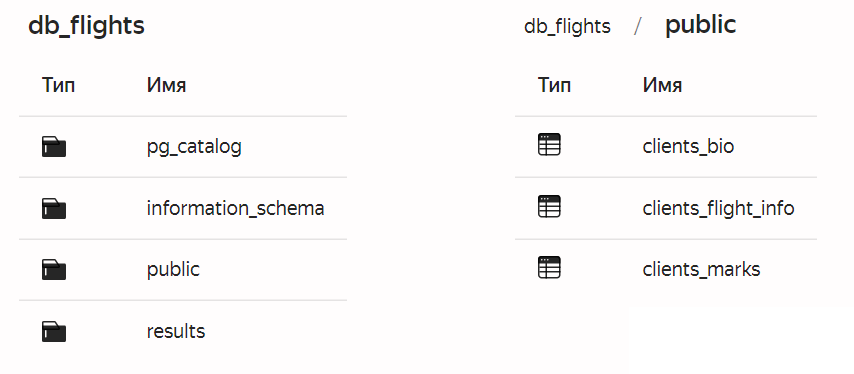

In [15]:
table_names = ['clients_bio', 'clients_flight_info', 'clients_marks']

# Подключение и выполнение запроса
with psycopg2.connect(host='rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net', 
                      port=6432, 
                      sslmode='verify-full',
                      dbname='db_flights', 
                      user='mlhs_student', 
                      password='mlhs_student', 
                      target_session_attrs='read-write', 
                      sslrootcert= "CA.pem") as conn:
    for i, table_name in enumerate(table_names):
        with conn.cursor() as cursor:
            cursor.execute(f'''
                        SELECT *
                        FROM {table_name} 
                        ''')
            data = cursor.fetchall()

        with conn.cursor() as cursor:
            cursor.execute(f'''
                        SELECT column_name
                        FROM information_schema.columns
                        WHERE table_schema = 'public'
                        AND table_name = '{table_name}';
                        ''')
            columns = cursor.fetchall()

            globals()[f'{table_name}'] = pd.DataFrame(data, columns=[col[0] for col in columns]).set_index('id')

In [16]:
df = clients_bio.join(clients_flight_info).join(clients_marks)

In [17]:
assert df.shape == (129_549, 23)

Разобьем датасет на тренировочную и тестовую части. Тестовую часть отложим надолго -- до самого конца этого ноутбука.

In [18]:
df_train = df[df.satisfaction != '-']
df_train.head()

,gender,age,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [19]:
assert df_train.shape == (103_644, 23)

In [20]:
df_test = df[df.satisfaction == '-'].drop('satisfaction', axis=1)
df_test.head()

,gender,age,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
id,,,,,,,,,,,,,,,,,,,,,
17,Female,48.0,Loyal Customer,Personal Travel,Eco,821.0,0.0,0.0,2.0,3.0,...,1.0,5.0,1.0,5.0,5.0,2.0,5.0,5.0,5.0,2.0
20,Female,42.0,Loyal Customer,Personal Travel,Eco,821.0,4.0,0.0,3.0,3.0,...,1.0,3.0,4.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0
35,Male,39.0,Loyal Customer,Business travel,Business,1672.0,23.0,17.0,2.0,2.0,...,5.0,4.0,5.0,3.0,3.0,4.0,5.0,5.0,3.0,5.0
44,Male,51.0,Loyal Customer,Business travel,Business,2077.0,0.0,1.0,4.0,1.0,...,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
49,Male,20.0,disloyal Customer,Business travel,Eco,108.0,0.0,29.0,4.0,5.0,...,5.0,4.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0


In [21]:
assert df_test.shape == (25_905, 22)

Разбиваем данные на трейн и валидацию. Не меняйте сид.

In [22]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('satisfaction', axis=1), df_train.satisfaction, test_size=0.3, random_state=42)

In [23]:
assert X_train.shape == (72_550, 22)
assert X_val.shape == (31_094, 22)

### **Задание 10 (0.25 балла)**

- Преобразуйте числовые столбцы в `float`. Проверьте, есть ли в датафрейме пропуски и выбросы (в том числе в категориальных признаках)
- Заполните пропуски в данных наиболее часто встречающимся значением.
Помните про правильность заполнения.
- Выведите основные статистики по числовым и категориальным столбцам таблицы
- Сделайте **текстовый** вывод о распределениях значений признаков

In [24]:
def cols_to_float(col):
    try:
        return col.map(float)
    except:
        return col

In [25]:
def fill_na(col, train):
    if col.dtype == 'float':
        col.fillna(train[col.name].median(), inplace=True)
    else:
        col.fillna(train[col.name].mode()[0], inplace=True)
    return col

In [26]:
df_train = df_train.apply(cols_to_float)
df_train.isna().sum()

gender                                 0
age                                  261
Customer Type                          0
Type of Travel                         0
class                                  0
Flight Distance                       72
Departure Delay in Minutes            84
Arrival Delay in Minutes             405
Inflight wifi service                 32
Departure/Arrival time convenient     41
Ease of Online booking                33
Gate location                         30
Food and drink                        35
Online boarding                       37
Seat comfort                          41
Inflight entertainment                42
On-board service                      32
Leg room service                      36
Baggage handling                      32
Checkin service                       34
Inflight service                      49
cleanliness                           31
satisfaction                           0
dtype: int64

Для оценки количесва выбросов можно посмотреть, какая доля объектов выходит за диапазон трех сигм

In [27]:
for col in list(df_train.select_dtypes(include='number').columns):
    mean = df_train[col].mean()
    std = df_train[col].std()
    upper_border = mean + 3*std
    lower_border = mean - 3*std
    # df_train = df_train.loc[(df_train[col] < upper_border) & (df_train[col] > lower_border)]
    print(f'{col} {len(df_train.loc[(df_train[col] > upper_border) | (df_train[col] < lower_border)])/len(df_train)*100:.2f}%')

age 0.31%
Flight Distance 0.15%
Departure Delay in Minutes 0.52%
Arrival Delay in Minutes 0.20%
Inflight wifi service 0.02%
Departure/Arrival time convenient 0.03%
Ease of Online booking 0.02%
Gate location 0.03%
Food and drink 0.02%
Online boarding 0.03%
Seat comfort 0.03%
Inflight entertainment 0.02%
On-board service 0.02%
Leg room service 0.03%
Baggage handling 0.02%
Checkin service 0.02%
Inflight service 0.03%
cleanliness 0.02%


### **Задание 11. (2 балла)**

Осуществите предобработку датасета для обучения **полностью самостоятельно**, на основе вашего опыта из прошлых дз и изученной теории. Обязательно **комментируйте** каждое действие.

**Примечание:**

В данном задании ваша задача в том числе убедить ревьюера в достаточности предобработки.

In [28]:
df_train.describe(include='object')

,gender,Customer Type,Type of Travel,class,satisfaction
count,103644,103644,103644,103644,103644
unique,2,3,3,4,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52590,84655,71423,49487,58732


Всё, что возможно в тренировочной и валидационной выборке привели к типу float. Явные пропуски в числовых признаках заполнили медианой из трейна, в категориальных - наиболее частым значением

In [29]:
X_train = X_train.apply(cols_to_float)
X_val = X_val.apply(cols_to_float)

X_train = X_train.apply(lambda col: fill_na(col, X_train))
X_val = X_val.apply(lambda col: fill_na(col, X_train))

In [30]:
pd.concat([X_train, X_val], axis=0).isna().sum()

gender                               0
age                                  0
Customer Type                        0
Type of Travel                       0
class                                0
Flight Distance                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
cleanliness                          0
dtype: int64

Рассмотрим категориальные признаки

In [31]:
X_train.describe(include=['object'])

,gender,Customer Type,Type of Travel,class
count,72550,72550,72550,72550
unique,2,3,3,4
top,Female,Loyal Customer,Business travel,Business
freq,36738,59314,49992,34574


In [32]:
X_train['gender'].value_counts()

gender
Female    36738
Male      35812
Name: count, dtype: int64

In [33]:
X_train['Customer Type'].value_counts()

Customer Type
Loyal Customer       59314
disloyal Customer    13186
nan                     50
Name: count, dtype: int64

In [34]:
X_train['Type of Travel'].value_counts()

Type of Travel
Business travel    49992
Personal Travel    22504
nan                   54
Name: count, dtype: int64

In [35]:
X_train['class'].value_counts()

class
Business    34574
Eco         32668
Eco Plus     5243
nan            65
Name: count, dtype: int64

Заменим все `'nan'` на наиболее частные значения из трейна

In [36]:
X_train.loc[(X_train['class']=='nan'), 'class'] = X_train['class'].mode()[0]
X_val.loc[(X_val['class']=='nan'), 'class'] = X_train['class'].mode()[0]

X_train.loc[(X_train['Type of Travel']=='nan'), 'Type of Travel'] = X_train['Type of Travel'].mode()[0]
X_val.loc[(X_val['Type of Travel']=='nan'), 'Type of Travel'] = X_train['Type of Travel'].mode()[0]

X_train.loc[(X_train['Customer Type']=='nan'), 'Customer Type'] = X_train['Customer Type'].mode()[0]
X_val.loc[(X_val['Customer Type']=='nan'), 'Customer Type'] = X_train['Customer Type'].mode()[0]

Закодируем целевую переменную `satisfaction` 0 и 1. Так же поступим и с другими бинарными признаками - `gender`, `Type of Travel` и `Customer Type`

In [37]:
X_train['gender'] = X_train['gender'].map({'Male': 0, 'Female': 1})
X_val['gender'] = X_val['gender'].map({'Male': 0, 'Female': 1})

X_train['Type of Travel'] = X_train['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})
X_val['Type of Travel'] = X_val['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})

X_train['Customer Type'] = X_train['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})
X_val['Customer Type'] = X_val['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})

# И про целевую переменную не забываем
y_train= y_train.map({'neutral or dissatisfied': 0, 'satisfied': 1})
y_val = y_val.map({'neutral or dissatisfied': 0, 'satisfied': 1})

Остался признак `class`, он принимает три разных значения. Его закодируем OHE

In [38]:
X_train = pd.get_dummies(X_train, drop_first=True, dtype='int')
X_val = pd.get_dummies(X_val, drop_first=True, dtype='int')

In [39]:
X_train.head(5)

,gender,age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness,class_Eco,class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
32806,0,38.0,0,0,3664.0,21.0,22.0,2.0,4.0,4.0,...,3.0,3.0,3.0,3.0,2.0,1.0,3.0,4.0,0,0
66453,1,37.0,0,1,1217.0,3.0,1.0,2.0,1.0,2.0,...,5.0,5.0,3.0,2.0,4.0,2.0,3.0,5.0,1,0
90663,0,41.0,0,0,240.0,0.0,0.0,2.0,2.0,2.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0,0
68907,0,56.0,0,1,1061.0,0.0,0.0,4.0,3.0,4.0,...,2.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,1,0
55080,0,27.0,0,0,1635.0,13.0,43.0,3.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,1,0


### **Задание 12. (0.25 балла)**

- Обучите самописное дерево и Random Forest с базовыми гиперпараметрами. Выведите `f1-score`.

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier()
dt = DecisionTree(feature_types=["real"] * X_train.shape[1], max_depth=5)

In [42]:
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_dt = f1_score(y_val, dt.predict(X_val))
print(f'f1 для самописного дерева: {f1_dt:.5f}')

f1_rf = f1_score(y_val, rf.predict(X_val))
print(f'f1 для случайного леса: {f1_rf:.5f}')

f1 для самописного дерева: 0.87491
f1 для случайного леса: 0.95328


### **Задание 13. (0.4 баллa)**

- Попробуйте подобрать оптимальные гиперпараметры леса и дерева (если реализовали их в бонусе), используя [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).
- Сравните качество полученных моделей и выберите лучшую. Лучшую модель сохраните в pickle.

**Важно:**  

Хотя бы один из гиперпараметров перебирайте из распределения (например, `uniform` из `scipy.stats`)

In [45]:
from scipy import stats as st
from sklearn.model_selection import RandomizedSearchCV

Чтобы использовать кросс-валидацию соеденим трейн и валидацию. Метрику будем смотреть только на валидации

In [46]:
X = pd.concat([X_train, X_val], axis=0)
y = pd.concat([y_train, y_val], axis=0)

In [47]:
from scipy.stats import uniform, randint

In [48]:
forest_params = {'n_estimators': randint(50, 500),
                 'max_depth': randint(3, 20),
                 'min_samples_split': [2, 4, 6, 8],
                 'min_samples_leaf': [1, 3, 5, 7]
                 }

tree_params = {'max_depth': randint(3, 20),
               'min_samples_split': [2, 4, 6, 8],
               'min_samples_leaf': [1, 3, 5, 7]
               }

In [49]:
rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=forest_params, cv=3, n_iter=15, scoring='f1')
rs.fit(X, y)

rf_best = rs.best_estimator_
f1_rf = f1_score(y_val, rf_best.predict(X_val))
print(f'f1 для случайного леса (на val выборке): {f1_rf:.5f}')

f1 для случайного леса (на val выборке): 0.97362


In [50]:
rs = RandomizedSearchCV(DecisionTree(feature_types=["real"] * X.shape[1], max_depth=5), param_distributions=forest_params, cv=3, n_iter=15, scoring='f1')
rs.fit(X, y)

dt_best = rs.best_estimator_
f1_dt = f1_score(y_val, dt_best.predict(X_val))
print(f'f1 самописного дерева (на val выборке): {f1_dt:.5f}')

f1 самописного дерева (на val выборке): 0.88277


In [51]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf_best, f)

### **Задание 14. Анализ моделей (0.1 балла)**

- Отобразите`feature_importances_` вашего лучшего случайного леса;
- Проанализируйте, какие признаки оказались важными?

In [52]:
feature_names = X.columns
importances = rf_best.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False) 
print(feature_imp_df)

                              Feature  Importance
12                    Online boarding    0.162737
7               Inflight wifi service    0.158658
3                      Type of Travel    0.113019
21                          class_Eco    0.092436
14             Inflight entertainment    0.075171
13                       Seat comfort    0.050156
16                   Leg room service    0.041020
2                       Customer Type    0.040773
9              Ease of Online booking    0.038944
15                   On-board service    0.029017
4                     Flight Distance    0.028358
20                        cleanliness    0.023882
17                   Baggage handling    0.023419
1                                 age    0.022977
19                   Inflight service    0.020148
18                    Checkin service    0.019173
8   Departure/Arrival time convenient    0.014072
10                      Gate location    0.012513
11                     Food and drink    0.009910


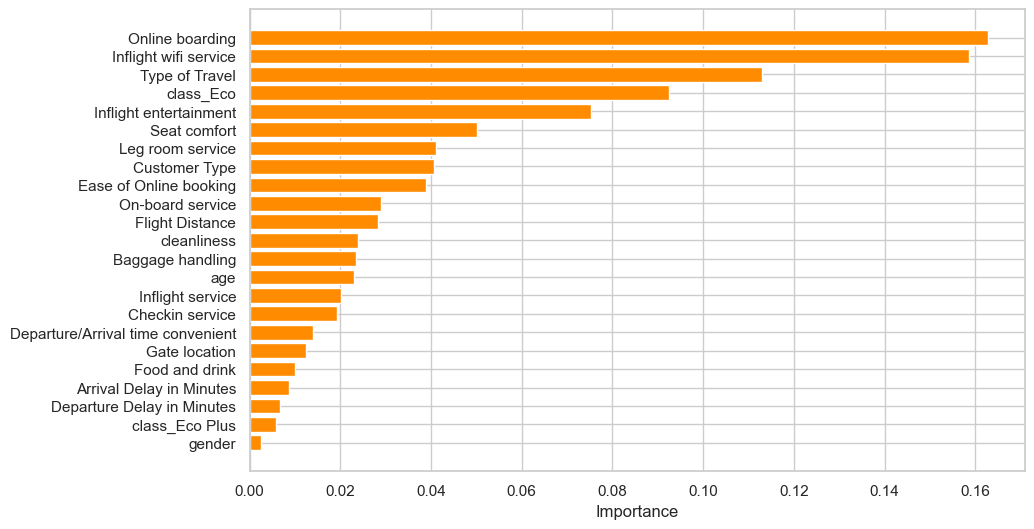

In [53]:
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'], color='darkorange')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.savefig('feature_importances.png')
plt.show()

Самыми незначим признаком оказался `gender`. Самыми значимыми - `Online boarding`, `Inflight wifi service` и `Type of Travel`. Очень занимательно, что люди больше ценят wifi, чем еду и напитки

### **Задание 15. (0.25 балла)**
- Интерпретируйте важности признаков с помощью SHAP.
- Опишите полученый график

**Важно:** Для подсчета используйте 1000 случайных объектов, иначе не дождетесь за приемлемое время

**Вам может помочь:** [Статья "Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow"](https://habr.com/ru/company/ods/blog/599573/) из блога ods.ai на Хабре

In [54]:
sample_indices = np.random.choice(X_val.index, size=1000, replace=False)
X_sample = X_val.loc[sample_indices]

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_sample)[:, :, 1]

shap.summary_plot(shap_values, X_sample, show=False)
plt.savefig("shap_summary_plot.png", bbox_inches="tight", dpi=300)  # Сохраняем в PNG
plt.close()

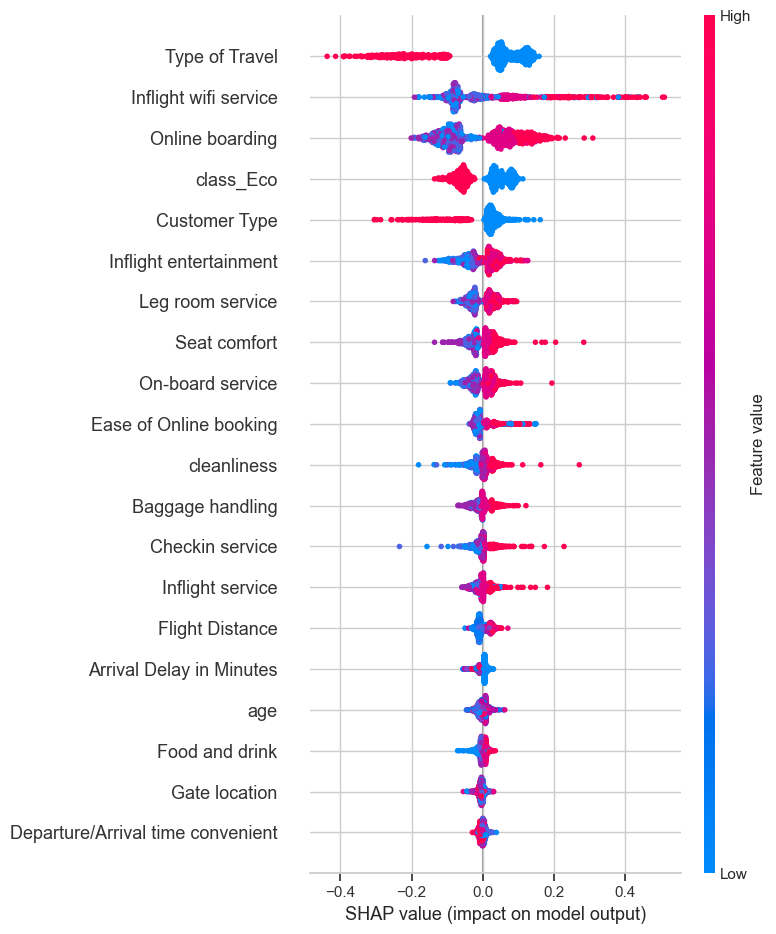

In [55]:
shap.summary_plot(shap_values, X_sample)

Важность признаков здесь распределена немного иначе, чем в `feature_importances_`, но первая тройка точно такая же - `Online boarding`, `Inflight wifi service` и `Type of Travel`. Причем четкое разделение по SHAP-value заметно только у нескольких признаков - `Type of Travel`, `class_Eco` (то есть если класс - эконом, то пассажир будет скорее неудовлетворен полетом) и `Costomer Type`

### **Задание 16. (0.25 балла)**

- Интерпретируйте важности признаков для одного прогноза с помощью LIME;
- Опишите полученный график для выбранного наблюдения

In [56]:
from lime import lime_tabular

In [57]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns,
    class_names=['neutral or dissatisfied', 'satisfied'],
    mode='classification'
)

In [58]:
observation = X_val.iloc[5].values # 5 объект

explanation = explainer.explain_instance(
    data_row=observation, 
    predict_fn=rf_best.predict_proba 
)

explanation.show_in_notebook()

Наибольший положительный вклад в ответ вносит `Type of travel`, отрицательный - `Costomer type`

## Котобонус!

0.25 балла

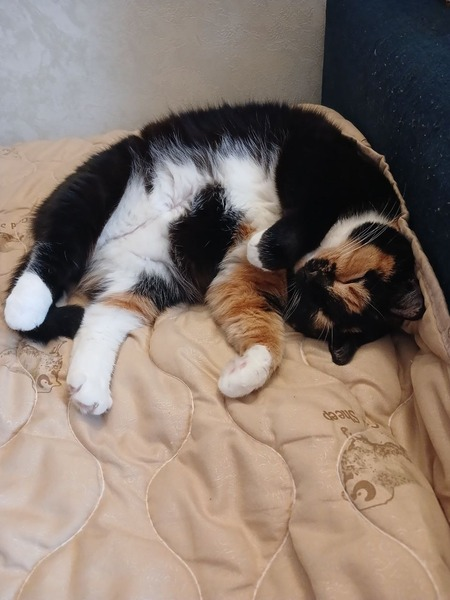

У меня такой же котик! Но предположу что это котик Сабрины

# Обратная связь

Расскажите, как вам это домашнее задание. Было ли оно полезным? Научились ли вы чему то? Насколько сложным по 10-балльной шкале оно вам показалось? Сколько времени у вас ушло на его выполнение? Что следовало ещё в него включить? Было ли что-то лишнее?

Достаточно сложное дз. Находить ошибки в коде, который ты сам не писал - это просто ужас, часто хотелось все снести и написать с нуля